In [5]:
import torch
words = open('names.txt', 'r').read().splitlines()

In [16]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [17]:
#create a training set
xs, ys= [],[]
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(f'{ch1}{ch2}')  
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

.e
em
mm
ma
a.


In [18]:
xs

tensor([ 0,  5, 13, 13,  1])

In [19]:
ys

tensor([ 5, 13, 13,  1,  0])

In [20]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
xenc.shape

torch.Size([5, 27])

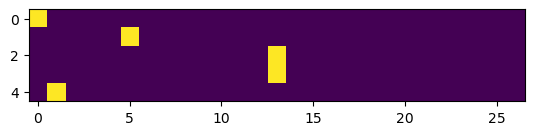

In [22]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

In [23]:
xenc.dtype

torch.float32

In [25]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-1.1778,  0.8296,  0.0125, -1.2935,  0.3692, -1.1774,  0.5294, -0.3342,
         -0.8011, -0.2708,  0.0345, -0.5367, -0.2262,  0.0457, -0.1023, -0.5977,
          0.6205, -1.7104,  0.2387, -0.2810, -0.4302,  0.4305,  0.3348, -0.5231,
         -1.1333,  0.9536, -0.4892],
        [-0.0964, -0.3381, -0.3855,  1.8795,  1.1640,  0.7245,  0.5477, -1.1073,
          0.7154,  0.0865,  1.7563, -0.1419, -0.6858,  0.0174,  0.5522,  0.5177,
          0.5188,  0.3120,  1.6840, -1.0093, -1.5873, -0.6187,  0.3674,  0.9280,
          1.2070,  0.1967,  2.2671],
        [ 2.1429,  0.2273,  0.2422,  0.4295,  0.6356,  0.8202, -0.1922, -0.2873,
          0.7888, -0.1296, -0.1832,  0.2327,  1.3435,  0.5808,  0.4039, -0.6748,
          0.8267,  0.2612,  0.7431,  0.9495, -1.1696, -1.9654,  0.0237,  0.2360,
         -0.8901,  0.1122, -0.4748],
        [ 2.1429,  0.2273,  0.2422,  0.4295,  0.6356,  0.8202, -0.1922, -0.2873,
          0.7888, -0.1296, -0.1832,  0.2327,  1.3435,  0.5808,  0.4039, -0.6748

In [26]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0119, 0.0883, 0.0390, 0.0106, 0.0557, 0.0119, 0.0654, 0.0276, 0.0173,
         0.0294, 0.0399, 0.0225, 0.0307, 0.0403, 0.0348, 0.0212, 0.0716, 0.0070,
         0.0489, 0.0291, 0.0251, 0.0593, 0.0538, 0.0228, 0.0124, 0.1000, 0.0236],
        [0.0155, 0.0122, 0.0116, 0.1117, 0.0546, 0.0352, 0.0295, 0.0056, 0.0349,
         0.0186, 0.0988, 0.0148, 0.0086, 0.0174, 0.0296, 0.0286, 0.0287, 0.0233,
         0.0919, 0.0062, 0.0035, 0.0092, 0.0246, 0.0431, 0.0570, 0.0208, 0.1646],
        [0.1925, 0.0283, 0.0288, 0.0347, 0.0426, 0.0513, 0.0186, 0.0169, 0.0497,
         0.0198, 0.0188, 0.0285, 0.0865, 0.0404, 0.0338, 0.0115, 0.0516, 0.0293,
         0.0475, 0.0584, 0.0070, 0.0032, 0.0231, 0.0286, 0.0093, 0.0253, 0.0140],
        [0.1925, 0.0283, 0.0288, 0.0347, 0.0426, 0.0513, 0.0186, 0.0169, 0.0497,
         0.0198, 0.0188, 0.0285, 0.0865, 0.0404, 0.0338, 0.0115, 0.0516, 0.0293,
         0.0475, 0.0584, 0.0070, 0.0032, 0.0231, 0.0286, 0.0093, 0.0253, 0.0140],
        [0.0279, 0.0354,

In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [30]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [31]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [32]:
xs

tensor([ 0,  5, 13, 13,  1])

In [33]:
ys

tensor([ 5, 13, 13,  1,  0])

In [34]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [36]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [37]:
print(loss.item())

3.7693049907684326


In [38]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [39]:
W.shape

torch.Size([27, 27])

In [40]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [41]:
W.data += -0.1 * W.grad

In [48]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [49]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.7686190605163574
3.3788068294525146
3.161090850830078
3.027186155319214
2.9344842433929443
2.8672313690185547
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463513374328613
2.633665084838867
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.582256317138672
2.5764293670654297
2.5711238384246826
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539441108703613
2.550442695617676
2.547192335128784
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243709087371826
2.522773265838623
2.521263837814331
2.519836664199829
2.5184855461120605
2.517204999923706
2.515990734100342
2.5148372650146484
2.5137410163879395
2.512697696685791
2.511704444885254
2.5107581615448
2.509855031967163
2.5089924335479736
2.5081686973571777
2.507380247116089
2.

In [50]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
